In [90]:
import os
import random
import numpy as np
import uuid
import cv2
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [9]:
PATH_TO_LIGHT_BACKGROUNDS = 'light_backgrounds/'
PATH_TO_DARK_BACKGROUNDS = 'dark_backgrounds/'
PATH_TO_FONT_FILES = 'fonts/'
OUTPUT_DIR = 'output/'
NUM_IMAGES_PER_CLASS = 10

In [10]:
# Get all files from directory
def get_files_from_dir(dirname):
    list_files = (os.listdir(dirname))
    list_files = [dirname + x for x in list_files]
    return list_files

In [11]:
# Random perspective distortion created by randomly moving the for corners of the image.
def get_distort_arg():
    amount = 5
    hundred_minus_amount = 100 - amount
    return '\'0,0 ' + str(np.random.randint(0,amount)) + ',' + str(np.random.randint(0,amount)) + ' 100,0 '  + str(np.random.randint(hundred_minus_amount,100)) + ',' + str(np.random.randint(0,amount)) + ' 0,100 '  + str(np.random.randint(0,amount)) + ',' + str(np.random.randint(hundred_minus_amount,100)) + ' 100,100 '  + str(np.random.randint(hundred_minus_amount,100)) + ',' + str(np.random.randint(hundred_minus_amount,100)) + '\''

In [12]:
# Randomly extracts 32x32 regions of an image and saves it to outdir
def create_random_crops(image_filename, num_crops, out_dir):
    #dim = os.popen('convert ' + image_filename + ' -ping -format "%w %h" info:').read()
    #dim = dim.split()
    #im_width = int(dim[0])
    #im_height = int(dim[1])
    im = cv2.imread(image_filename)
    im_height, im_width, _ = im.shape
      
    # Randomly select first co-ordinate of square for cropping image
    for i in range(0, num_crops):
        x = random.randint(0,im_width - 32)
        y = random.randint(0,im_height - 32)
        outfile = uuid.uuid4().hex + '.jpg'
        im_crop = im[y:y+32,x:x+32]
        print(out_dir+outfile)
        cv2.imwrite(out_dir+outfile,im_crop)

In [13]:
# Generate crops for all files in file_list and store them in dirname
def generate_crops(file_list, dirname):
    if not os.path.isdir(dirname):
        os.mkdir(dirname)
    for f in file_list:
        create_random_crops(f, 50, dirname)

In [77]:
'''
# List of characters
char_list = []
for i in range(65, 65+26):
    char_list.append(chr(i))

# List of digits
for j in range(48,48+10):
    char_list.append(chr(j))
    
'''

# List of light font colors
color_light = [(255,255,255),(0, 255,192 ),(128,128,128),(0,255, 255),(215, 208,205 ),(255, 255,0)]

# List of light dark colors
color_dark = [(0,0,0),(0,255,0),(0,0,128),(255,0,0),(231, 139,197),(0,0,255)]

# List of light backgrounds
light_backgrounds = get_files_from_dir(PATH_TO_LIGHT_BACKGROUNDS)
# List of dark backgrounds
dark_backgrounds = get_files_from_dir(PATH_TO_DARK_BACKGROUNDS)
'''
# List of font files
list_files_fontt = get_files_from_dir(PATH_TO_FONT_FILES)
'''
light_backgrounds_crops_dir = 'light_backgrounds_crops/'
dark_backgrounds_crops_dir = 'dark_backgrounds_crops/'

generate_crops(light_backgrounds, light_backgrounds_crops_dir)
generate_crops(dark_backgrounds, dark_backgrounds_crops_dir)

# List of all files in the crops directory
light_backgrounds = get_files_from_dir(light_backgrounds_crops_dir)
dark_backgrounds = get_files_from_dir(dark_backgrounds_crops_dir)

# List of all backgrounds
all_backgrounds = [dark_backgrounds, light_backgrounds]

light_backgrounds_crops/cbf2820f99ee4c8eadddbd65a0084bec.jpg
light_backgrounds_crops/d19cf5acc61c4b98bedcc81401fd81e8.jpg
light_backgrounds_crops/e4acce2a349d42618e79ebbb04a49ed4.jpg
light_backgrounds_crops/b125917e8dcf4efcac76876f4b3a6e2f.jpg
light_backgrounds_crops/4711bb0473bc4c0e8d171d81a8ec73ab.jpg
light_backgrounds_crops/b2bb96e2a4eb45cbb9a2012fcf9dc5d8.jpg
light_backgrounds_crops/9cc0ea7b68b049159544cf619a2ba6c1.jpg
light_backgrounds_crops/fb984b26567f4ce1ba128764a07ede70.jpg
light_backgrounds_crops/5c9934588204422893ed14d55bab49ec.jpg
light_backgrounds_crops/99291edcf6734df2a48cfbc9d61a8fdd.jpg
light_backgrounds_crops/ba34a9014a1647ad81595b71ba2fca58.jpg
light_backgrounds_crops/887d216b6cee493782be3dc6348a941c.jpg
light_backgrounds_crops/d4cf7a9565de48c5ba501f6b94a65a3d.jpg
light_backgrounds_crops/69e47ffbced343dcb41e3420d1d28865.jpg
light_backgrounds_crops/d1b66456554348acaaeff95df4c044ff.jpg
light_backgrounds_crops/b352bb83d61642db9c813e00b35a2488.jpg
light_backgrounds_crops/

light_backgrounds_crops/49d138cab83244bdae2098d6ef9322e4.jpg
light_backgrounds_crops/e329f57ef93b4a9694b16d348d2e4ca3.jpg
light_backgrounds_crops/62eb2d80ecb341f9a7a8564acf9116b8.jpg
light_backgrounds_crops/9f94aea08a4b469dbb5050789b650af7.jpg
light_backgrounds_crops/5846397c55f04a99a4da172be6777ae4.jpg
light_backgrounds_crops/3afd6d9669ec499199dda40b208615b3.jpg
light_backgrounds_crops/5faf4a5f9a894db2bd08639d532d0930.jpg
light_backgrounds_crops/c8a6125d1a8a4d3088a82a7663266de2.jpg
light_backgrounds_crops/71095e6e0103413aad3f31d923af4add.jpg
light_backgrounds_crops/3720b2e4e61948a787529a353ee81d27.jpg
light_backgrounds_crops/c5c49479e15640389b6d2c906619f9de.jpg
light_backgrounds_crops/159c25c04c2346e99e602abfeafb862f.jpg
light_backgrounds_crops/142cf937f2574bdd92f7c7043847b3bb.jpg
light_backgrounds_crops/1090c5908dc54899a7b77360b6af3105.jpg
light_backgrounds_crops/d2abb75a50c942df889a2bc37ab19c4e.jpg
light_backgrounds_crops/c005b39ada2a4681a65cb10ec7178c11.jpg
light_backgrounds_crops/

light_backgrounds_crops/647b8c0af5b243dfa42a7462bac8dfda.jpg
light_backgrounds_crops/85c0d76b5ffb4c269e7f64a09b175114.jpg
light_backgrounds_crops/0effa59a2cb24f14ae7d0e0c51fed60b.jpg
light_backgrounds_crops/ee6f702d1c97425aa3c95f143021ee3d.jpg
light_backgrounds_crops/9a35babebc594f23a3f422dd6f1a2f2a.jpg
light_backgrounds_crops/d1f54ac1582a47e2815e61d6aeb43cc5.jpg
light_backgrounds_crops/43bad15284c449f285a3b0ac4f3efb4a.jpg
light_backgrounds_crops/03ddf2ee03314b8cb79d9b7c36700249.jpg
light_backgrounds_crops/02ee849777394be5910cd3d08f65a789.jpg
light_backgrounds_crops/acd127d623e3418ca6864352d95333f3.jpg
light_backgrounds_crops/a2cc487ac60845d7b253beaad23b9d2c.jpg
light_backgrounds_crops/72a00e29c8b74a52af0281432565b05b.jpg
light_backgrounds_crops/2e879fcb5aef44dcbacf9931fc8d9e90.jpg
light_backgrounds_crops/0fba0eda27dc4cda91872d9c9aed822d.jpg
light_backgrounds_crops/e698d3c9c80742f2a33138800929b88b.jpg
light_backgrounds_crops/71b2a044464447bab20a1e26e69e0d0b.jpg
light_backgrounds_crops/

dark_backgrounds_crops/d4dccd8560a84572843a03a3a6272d4a.jpg
dark_backgrounds_crops/863f066b7be54f799d4feeea2dcb200d.jpg
dark_backgrounds_crops/1e1f958bea4146c88ca7bf89400c5ba4.jpg
dark_backgrounds_crops/bd4a0da75c74408db5ebba754b8d8a52.jpg
dark_backgrounds_crops/58b34eb02bc444be8bc1a901a1691bc6.jpg
dark_backgrounds_crops/7cd5ca62ea86490f8d8b1eccdc12a417.jpg
dark_backgrounds_crops/859ace40142246baa8860c2184d0c1f8.jpg
dark_backgrounds_crops/754bf21d94f84fb3b5dd260f28178eba.jpg
dark_backgrounds_crops/0d9d5ea8025a4880b76b7820a98e5362.jpg
dark_backgrounds_crops/9d00fccc9d98464786840caa34d4368c.jpg
dark_backgrounds_crops/f50bf3b48f8d4c3dba9dbbce0ef71711.jpg
dark_backgrounds_crops/78398e74ee2749dda4e958617b5d36a1.jpg
dark_backgrounds_crops/65548bbce1a14848871299a423548ebc.jpg
dark_backgrounds_crops/3490976d10e2465fbb979f5d7b87e5b6.jpg
dark_backgrounds_crops/b423f79171f34620961d5ed8913c8400.jpg
dark_backgrounds_crops/c95a9c163cc24beb97a3b61819fdfe3c.jpg
dark_backgrounds_crops/a3a7bc7213724bf48

dark_backgrounds_crops/5176f7252c7f4b9faf21e97eb9d199f3.jpg
dark_backgrounds_crops/227dd460502b4c77978fd7ca1082dcd7.jpg
dark_backgrounds_crops/0ef3dd69b9354cb986cdce65c62c7761.jpg
dark_backgrounds_crops/bd37aa8369d74acbad978d5d128d23c3.jpg
dark_backgrounds_crops/a71bacad25634338923bf58ba7d6fafe.jpg
dark_backgrounds_crops/f919a91433054a3a978d97737a77c9e0.jpg
dark_backgrounds_crops/7334ed5400b0459a952bffca4ed54cd2.jpg
dark_backgrounds_crops/5fc54d0873404a59bd37815670d1a46c.jpg
dark_backgrounds_crops/d15b4e89ca9148e29b4475227ff6f294.jpg
dark_backgrounds_crops/d1ea5c72a2ab4170982d0371450a0b37.jpg
dark_backgrounds_crops/d7ebdb179043446b826d0e5120434fe0.jpg
dark_backgrounds_crops/54147be983564a9dac5c5904addced0c.jpg
dark_backgrounds_crops/da3245433f9c4a19b48abd709e350db4.jpg
dark_backgrounds_crops/b940b1d5a6504ee1abc42501b8252c19.jpg
dark_backgrounds_crops/cfaa416d1175405183ef8c14fcaae752.jpg
dark_backgrounds_crops/394a5fe51e1e42d9bec3a35338528f5e.jpg
dark_backgrounds_crops/e6d05b79caeb4c4e8

In [114]:
for i in range(0,123):
    
    '''
    char = char_list[i]
    char_output_dir = OUTPUT_DIR + str(char) + "/"
    
    if not os.path.exists(char_output_dir):
        os.makedirs(char_output_dir)
        
    print("Generating data " + char_output_dir)
    '''
    
    # Generate synthetic images
    for j in range(0,NUM_IMAGES_PER_CLASS):

        # Choose a light or dark background
        path = random.choice(all_backgrounds)
        # Choose a file
        list_filernd = random.choice(path)
       
        '''
        # Choose a font
        list_rfo = random.choice(list_files_fontt)

        # Get random distortion
        distort_arg = get_distort_arg()

        # Get random blur amount
        blur = random.randint(0,3)

        # Get random noise amount
        noise = random.randint(0,5)

        # Add random shifts from the center
        x = str(random.randint(-3,3))
        y = str(random.randint(-3,3))
        '''
        
        # Choose light color for dark backgrounds and vice-versa
        if path == all_backgrounds[0] :
            color = random.choice(color_light)
        else:
            color = random.choice(color_dark)

        '''    
        command =  "convert " + str(list_filernd) + " -fill "+str(color)+" -font "+ \
            str(list_rfo) + " -weight 200 -pointsize 24 -distort Perspective "+str(distort_arg)+" "+"-gravity center" + " -blur 0x" + str(blur) \
        + " -evaluate Gaussian-noise " + str(noise) +  " " + " -annotate +" + x + "+" + y + " " +  str(char_list[i]) + " " + char_output_dir + "output_file"+str(i)+str(j)+".jpg"
        
         # Uncomment line below to see what command is executed.
        # print(command)
        os.system(str(command))
        '''
        
        im_rgb = cv2.imread("./test.jpg", 0) ##
        
        im_rgb = cv2.resize(im_rgb, (32,32))
        im = cv2.bitwise_not(im_rgb)

        im = cv2.inRange(im,150,255)
        _, cnt,_ = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        '''
        blank = np.zeros([32,32,3],dtype=np.uint8)
        blank.fill(255)
        '''
        blank = cv2.imread("./test0.jpg")

        cv2.drawContours(blank, cnt, -1, (0,0,255),-1)

        cv2.imwrite("new.jpg",blank)
        
       

Generating data output/A/
Generating data output/B/
Generating data output/C/
Generating data output/D/
Generating data output/E/
Generating data output/F/
Generating data output/G/
Generating data output/H/
Generating data output/I/
Generating data output/J/
Generating data output/K/
Generating data output/L/
Generating data output/M/
Generating data output/N/
Generating data output/O/
Generating data output/P/
Generating data output/Q/
Generating data output/R/
Generating data output/S/
Generating data output/T/
Generating data output/U/
Generating data output/V/
Generating data output/W/
Generating data output/X/
Generating data output/Y/
Generating data output/Z/
Generating data output/0/
Generating data output/1/
Generating data output/2/
Generating data output/3/
Generating data output/4/
Generating data output/5/
Generating data output/6/
Generating data output/7/
Generating data output/8/
Generating data output/9/


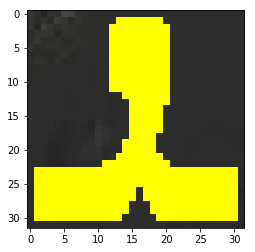

In [88]:
for f in glob.glob("./dataset/*"):
    for subf in glob.glob(f+"/*"):
        for img in glob.glob(subf+"/*"):
            # Choose a light or dark background
            path = random.choice(all_backgrounds)
            # Choose a file
            list_filernd = random.choice(path)
            
            im_rgb = cv2.imread(img,0)
            im_rgb = cv2.resize(im_rgb, (32,32))
            im = cv2.bitwise_not(im_rgb)

            im = cv2.inRange(im,150,255)
            _, cnt,_ = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


            blank = cv2.imread(list_filernd)
            # Choose light color for dark backgrounds and vice-versa
            if path == all_backgrounds[0] :
                color = random.choice(color_light)
            else:
                color = random.choice(color_dark)

            cv2.drawContours(blank, cnt, -1, color,-1)

            cv2.imwrite(img,blank)

        
             

In [93]:
# Dimensions of our images
img_width, img_height = 32, 32

# 3 channel image
no_of_channels = 3

# train data Directory
train_data_dir = './dataset/train/' 
# test data Directory
validation_data_dir = './dataset/test/' 

epochs = 80
batch_size = 32

#initialize model
model = Sequential()
model.add(Convolution2D(5, 3, 3, input_shape = (32,32, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Convolution2D(16, 3, 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(output_dim = 780, activation = 'relu'))
model.add(Dense(output_dim = 300, activation = 'relu')) 
model.add(Dense(output_dim = 120, activation = 'relu')) 
model.add(Dense(output_dim = 123, activation = 'softmax'))

'''
# first layer CONV => RELU => POOL
model.add(Convolution2D(32, (3, 3), input_shape = (img_width, img_height, no_of_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# second layer CONV => RELU => POOL
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# third layer of CONV => RELU => POOL
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# set of FC => RELU layers
model.add(Flatten())

# number of neurons in FC layer = 128
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# as number of classes is 36
model.add(Dense(123))
model.add(Activation('softmax'))
'''

print('building done')
# Compile model
#adam = optimizers.Adam (lr=0.001)
print('optimizing done')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('compiling')

# this is the augmentation configuration used for training
# horizontal_flip = False, as we need to retain Characters
'''
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=False)

# this is the augmentation configuration used for testing, only rescaling
test_datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rescale=1. / 255)
'''

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# fit the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / batch_size, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / batch_size)  

# evaluate on validation dataset
model.evaluate_generator(validation_generator)
# save weights in a file
model.save_weights('trained_weights.h5') 

print(history.history)

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=780, activation="relu")`
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=300, activation="relu")`
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=120, activation="relu")`
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:25: UserWarning: Update your `Dense` call to the

building done
optimizing done
compiling
Found 196767 images belonging to 123 classes.
Found 49200 images belonging to 123 classes.
Epoch 1/80
6149/6148 [==============================] - 4049s 658ms/step - loss: 1.3373 - acc: 0.6668 - val_loss: 12.6112 - val_acc: 0.0828
Epoch 2/80
6149/6148 [==============================] - 3098s 504ms/step - loss: 0.5892 - acc: 0.8474 - val_loss: 12.9629 - val_acc: 0.0912
Epoch 3/80
6149/6148 [==============================] - 5770s 938ms/step - loss: 0.4781 - acc: 0.8745 - val_loss: 13.0859 - val_acc: 0.0835
Epoch 4/80
  25/6148 [..............................] - ETA: 46:49 - loss: 0.4570 - acc: 0.8762

KeyboardInterrupt: 